In [ ]:
# Import
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (20.0, 10.0)
inline_rc = dict(mpl.rcParams)
# from classification_utilities import make_facies_log_plot

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import LeavePGroupsOut
from sklearn.metrics import f1_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier

from scipy.signal import medfilt


In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm

folder = "TGA"
filename = os.listdir(folder)
# filename.remove('.ipynb_checkpoints')
filename

['MONTANA.xlsx',
 'BRONX.xlsx',
 'BERKELEY.xlsx',
 'MANHATTAN_7.xlsx',
 'PORTOBELLO.xlsx',
 'BROOKLYN_10.xlsx',
 'MEMPHIS.xlsx']

In [ ]:
colom  = ['DEPTH', 'GR', 'ResD', 'RHOB', 'NPHI', 'DTS']
for i in range(len(filename)):
  da = pd.read_excel(folder+"/"+filename[i])
  # da = da.replace([-999,-999.25],np.nan)
  # da = da.dropna()
  da = da[da["ResD"] < 200]
  try:
    da = da.drop(columns = ['FACIES'])
  except:
    pass
  
  if len(da.columns)  > 6:
    da = da.drop(columns = ['PE'])
  print(da.columns)
  print(len(da))
  # da.columns = colom
  da['WELL'] = [filename[i].split('.')[0] for k in range(len(da))]
  if i == 0:
    data = da
  else:
    data = pd.concat([data,da], axis=0)

Index(['DEPTH', 'GR', 'ResD', 'RHOB', 'NPHI', 'DTS'], dtype='object')
13817
Index(['DEPTH', 'GR', 'ResD', 'RHOB', 'NPHI', 'DTS'], dtype='object')
13405
Index(['DEPTH', 'GR', 'ResD', 'RHOB', 'NPHI', 'DTS'], dtype='object')
7384
Index(['DEPTH', 'GR', 'ResD', 'RHOB', 'NPHI', 'DTS'], dtype='object')
11725
Index(['DEPTH', 'GR', 'ResD', 'RHOB', 'NPHI', 'DTS'], dtype='object')
6600
Index(['DEPTH', 'GR', 'ResD', 'RHOB', 'NPHI', 'DTS'], dtype='object')
8673
Index(['DEPTH', 'GR', 'ResD', 'RHOB', 'NPHI', 'DTS'], dtype='object')
9111


In [ ]:
data = data.replace([-999,-999.25],np.nan)
# target = data.isna().any(axis = 1)
data['WELL'] = data["WELL"].replace("MONTANA", "MONTANA_3")
data['WELL'] = data["WELL"].replace("BRONX", "BRONX_2")
data['WELL'] = data["WELL"].replace("BERKELEY", "BERKELEY_4")
data['WELL'] = data["WELL"].replace("MEMPHIS", "MEMPHIS_1")
data['WELL'] = data["WELL"].replace("PORTOBELLO", "PORTOBELLO_5")


In [ ]:
dataob = data.copy()


In [ ]:
an = np.array(dataob.isna().any(axis=1))
dataob['nan'] = an

In [ ]:
data.isna().sum()

DEPTH        0
GR       13442
ResD     15022
RHOB     14576
NPHI     15913
DTS      27669
WELL         0
dtype: int64

In [ ]:
da = pd.read_excel(folder+"/"+'MANHATTAN_7.xlsx')
da = da.replace([-999,-999.25],np.nan)
# da = da.dropna()
# data = data[data["WELL"] != "KNOXVILLE"]
# wells = data.groupby('WELL')
da.isna().sum()
# da = da[da["ResD"] < 200]
# len(da)
# da.describe()

DEPTH       0
GR       3372
ResD     3490
RHOB     3506
NPHI     3543
DTS      3412
PE       7142
dtype: int64

In [ ]:
m =data[data['WELL']=='MANHATTAN_7']
m = m.replace([-999,-999.25],np.nan)
# m = m.dropna()
m.isna().sum()
# m.describe()

DEPTH       0
GR       3372
ResD     3490
RHOB     3506
NPHI     3543
DTS      3412
WELL        0
dtype: int64

In [ ]:
data.describe()

,DEPTH,GR,ResD,RHOB,NPHI,DTS
count,70715.000000,57273.000000,55693.000000,56139.000000,54802.000000,43046.000000
mean,1550.486505,52.298617,2.658966,1.895448,0.523726,234.796797
std,900.621467,19.244889,3.789435,0.142218,0.080470,175.755393
min,0.000000,0.000000,0.059000,1.394000,0.103200,43.780000
25%,849.250000,38.275002,1.103200,1.810000,0.492100,159.650000
50%,1481.250000,49.010000,1.651000,1.895000,0.526900,168.770000
75%,2205.000000,65.322000,2.409000,1.982500,0.560000,187.630000
max,3700.000000,127.339000,79.820400,2.970000,6.070700,826.059021


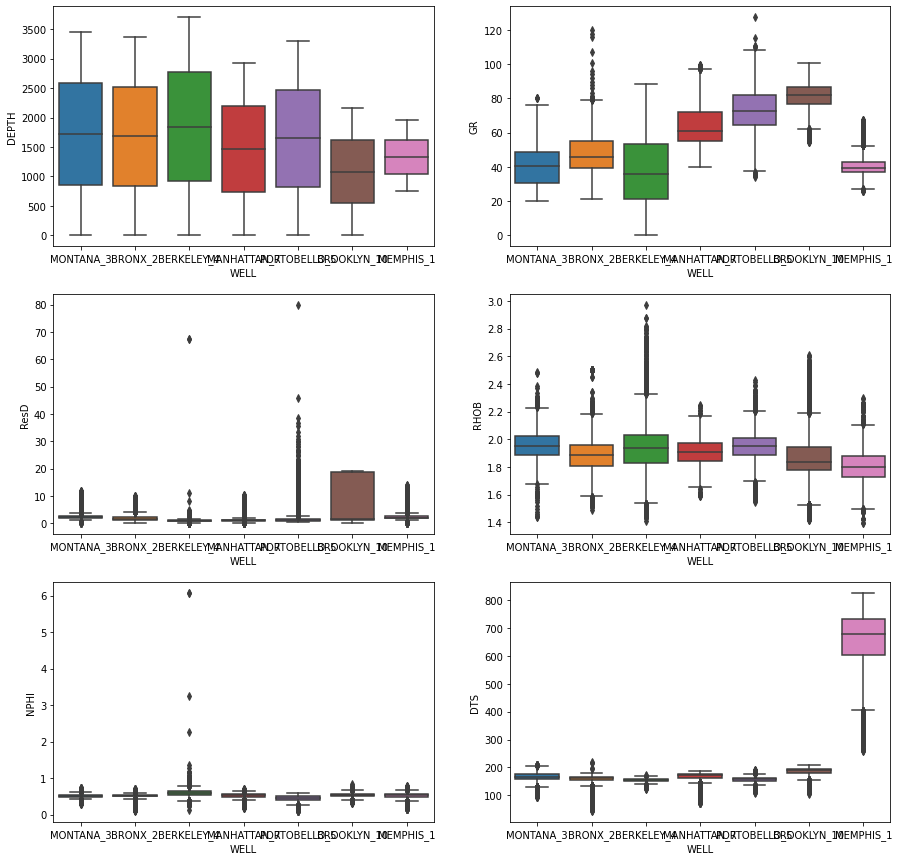

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(321)
sns.boxplot(x=data['WELL'], y=data[colom[0]])
plt.subplot(322)
sns.boxplot(x=data['WELL'], y=data[colom[1]])
plt.subplot(323)
sns.boxplot(x=data['WELL'], y=data[colom[2]])
plt.subplot(324)
sns.boxplot(x=data['WELL'], y=data[colom[3]])
plt.subplot(325)
sns.boxplot(x=data['WELL'], y=data[colom[4]])
plt.subplot(326)
sns.boxplot(x=data['WELL'], y=data[colom[5]])

plt.show()

In [ ]:
data = data[data["ResD"] < 200]

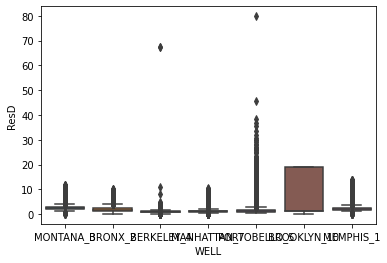

In [ ]:
sns.boxplot(x=data['WELL'], y=data[colom[2]])
plt.show()

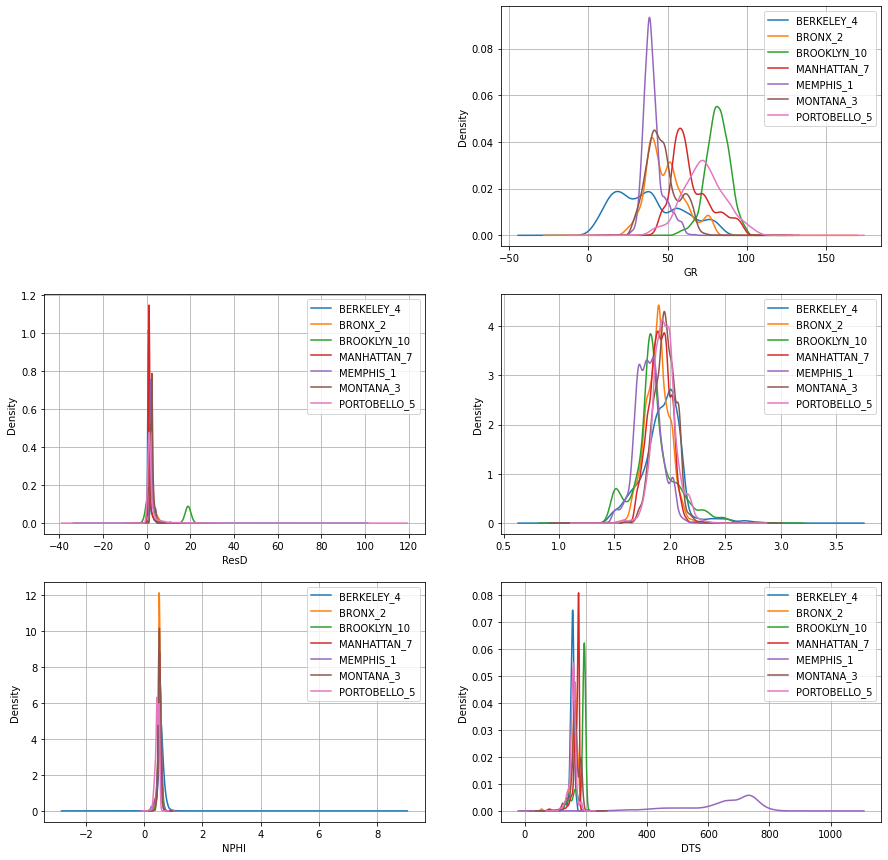

In [ ]:
wells = data.groupby('WELL')
plt.subplots(figsize=(15,15))
for i in range(5):
  plt.subplot(3,2,i+2)
  for label, df in wells:
      df[colom[i+1]].plot(kind ='kde', label=label)
      # plt.xlim(0, 200)
      plt.xlabel(colom[i+1])
  plt.grid(True)
  plt.legend()
plt.show()

In [ ]:
for i in range(1,len(colom)):
  percentile_05 = data.groupby('WELL')[colom[i]].quantile(0.05)
  gr_percentile_95 = data.groupby('WELL')['GR'].quantile(0.95)  
  name = "{}_05p".format(colom[i])
  name2 = "{}_95p".format(colom[i])
  data[name] = data['WELL'].map(percentile_05)
  data[name2] = data['WELL'].map(gr_percentile_95)
  

In [ ]:
data.describe()

,DEPTH,GR,ResD,RHOB,NPHI,DTS,GR_05p,GR_95p,ResD_05p,ResD_95p,RHOB_05p,RHOB_95p,NPHI_05p,NPHI_95p,DTS_05p,DTS_95p
count,55693.000000,52035.000000,55693.000000,55085.000000,54133.000000,41764.000000,55693.000000,55693.000000,55693.000000,55693.000000,55693.000000,55693.000000,55693.000000,55693.000000,55693.000000,55693.000000
mean,1796.218061,54.322422,2.658966,1.894630,0.523679,237.478898,39.612993,76.701095,1.010145,76.701095,1.685671,76.701095,0.416310,76.701095,182.144575,76.701095
std,764.280855,18.655488,3.789435,0.140582,0.079781,177.567305,16.239558,14.646060,0.388186,14.646060,0.094829,14.646060,0.040643,14.646060,99.934968,14.646060
min,100.000000,0.000000,0.059000,1.394000,0.131200,50.750000,9.265000,53.841000,0.506000,53.841000,1.521290,53.841000,0.334530,53.841000,131.967000,53.841000
25%,1203.250000,40.001999,1.103200,1.810000,0.491800,159.870000,31.610000,64.880000,0.686000,64.880000,1.619878,64.880000,0.389546,64.880000,134.360500,64.880000
50%,1701.500000,51.640000,1.651000,1.893500,0.526550,168.910000,32.993999,73.970000,0.861035,73.970000,1.710000,73.970000,0.440000,73.970000,141.033500,73.970000
75%,2367.250000,67.575500,2.409000,1.980928,0.560000,187.720000,47.973000,90.989000,1.506000,90.989000,1.793200,90.989000,0.449740,90.989000,145.248000,90.989000
max,3628.000000,127.339000,79.820400,2.970000,6.070700,826.059021,68.934000,95.877670,1.563150,95.877670,1.797015,95.877670,0.458000,95.877670,407.989014,95.877670


In [ ]:
def normalise(curve, ref_low, ref_high, well_low, well_high):
    return ref_low + ((ref_high - ref_low) * ((curve - well_low) / (well_high - well_low)))

In [ ]:
for i in range(5):
  key_well_low =  data["{}_05p".format(colom[i+1])].mean()
  key_well_high = data["{}_95p".format(colom[i+1])].mean()
  name = "norm_{}".format(colom[i+1])
  data[name] = data.apply(lambda x: normalise(x[colom[i+1]], key_well_low, key_well_high, x["{}_05p".format(colom[i+1])], x["{}_95p".format(colom[i+1])]), axis=1)

In [ ]:
data.describe()

,DEPTH,GR,ResD,RHOB,NPHI,DTS,GR_05p,GR_95p,ResD_05p,ResD_95p,RHOB_05p,RHOB_95p,NPHI_05p,NPHI_95p,DTS_05p,DTS_95p,norm_GR,norm_ResD,norm_RHOB,norm_NPHI,norm_DTS
count,55693.000000,52035.000000,55693.000000,55085.000000,54133.000000,41764.000000,55693.000000,55693.000000,55693.000000,55693.000000,55693.000000,55693.000000,55693.000000,55693.000000,55693.000000,55693.000000,52035.000000,55693.000000,55085.000000,54133.000000,41764.000000
mean,1796.218061,54.322422,2.658966,1.894630,0.523679,237.478898,39.612993,76.701095,1.010145,76.701095,1.685671,76.701095,0.416310,76.701095,182.144575,76.701095,55.380481,2.575549,1.898613,0.528838,237.916889
std,764.280855,18.655488,3.789435,0.140582,0.079781,177.567305,16.239558,14.646060,0.388186,14.646060,0.094829,14.646060,0.040643,14.646060,99.934968,14.646060,11.125066,3.177073,0.148987,0.088735,35.253650
min,100.000000,0.000000,0.059000,1.394000,0.131200,50.750000,9.265000,53.841000,0.506000,53.841000,1.521290,53.841000,0.334530,53.841000,131.967000,53.841000,17.368091,-0.981379,1.263308,0.085196,34.485160
25%,1203.250000,40.001999,1.103200,1.810000,0.491800,159.870000,31.610000,64.880000,0.686000,64.880000,1.619878,64.880000,0.389546,64.880000,134.360500,64.880000,47.248442,1.243042,1.799865,0.481438,220.411518
50%,1701.500000,51.640000,1.651000,1.893500,0.526550,168.910000,32.993999,73.970000,0.861035,73.970000,1.710000,73.970000,0.440000,73.970000,141.033500,73.970000,53.703033,1.610877,1.884010,0.520056,238.360435
75%,2367.250000,67.575500,2.409000,1.980928,0.560000,187.720000,47.973000,90.989000,1.506000,90.989000,1.793200,90.989000,0.449740,90.989000,145.248000,90.989000,62.301511,2.327647,1.977454,0.567748,256.512606
max,3628.000000,127.339000,79.820400,2.970000,6.070700,826.059021,68.934000,95.877670,1.563150,95.877670,1.797015,95.877670,0.458000,95.877670,407.989014,95.877670,117.107514,67.728101,3.046939,6.050492,328.938572


In [ ]:
wells = data.groupby('WELL')
data.isna().sum()

DEPTH            0
GR            3658
ResD             0
RHOB           608
NPHI          1560
DTS          13929
WELL             0
GR_05p           0
GR_95p           0
ResD_05p         0
ResD_95p         0
RHOB_05p         0
RHOB_95p         0
NPHI_05p         0
NPHI_95p         0
DTS_05p          0
DTS_95p          0
norm_GR       3658
norm_ResD        0
norm_RHOB      608
norm_NPHI     1560
norm_DTS     13929
dtype: int64

In [ ]:
data['WELL'].unique()

array(['MONTANA_3', 'BRONX_2', 'BERKELEY_4', 'MANHATTAN_7',
       'PORTOBELLO_5', 'BROOKLYN_10', 'MEMPHIS_1'], dtype=object)

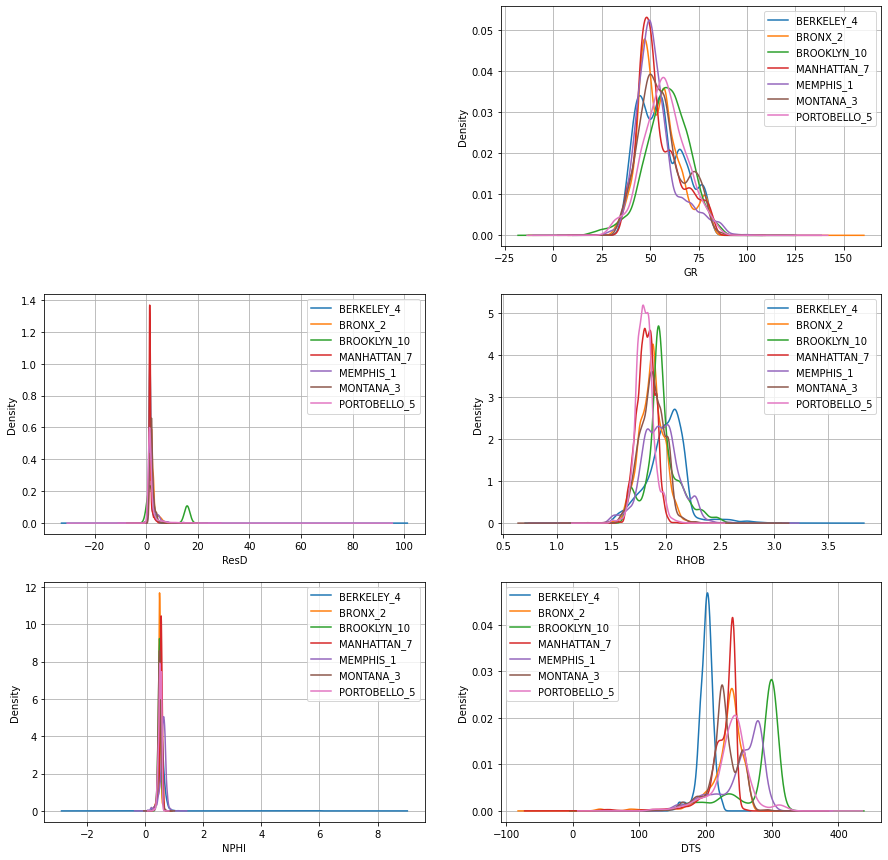

In [ ]:
plt.subplots(figsize=(15,15))
for i in range(5):
  plt.subplot(3,2,i+2)
  for label, df in wells:
      df["norm_{}".format(colom[i+1])].plot(kind ='kde', label=label)
      # plt.xlim(0, 200)
      plt.xlabel(colom[i+1])
  plt.grid(True)
  plt.legend()
plt.show()

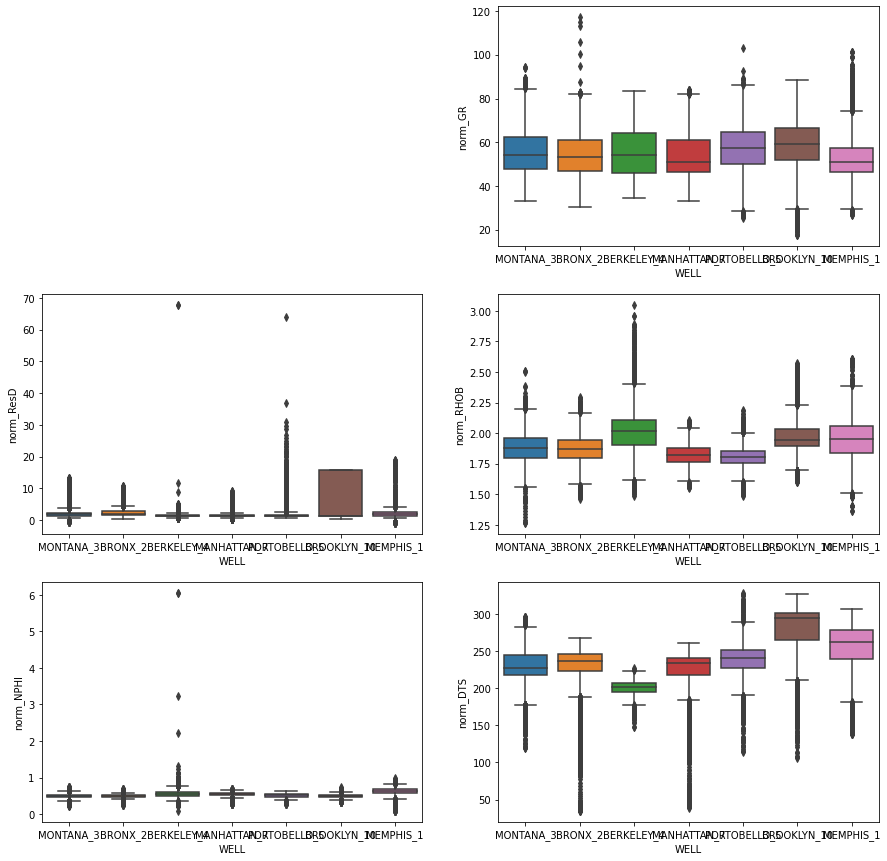

In [ ]:
plt.figure(figsize=(15,15))
# plt.subplot(321)
# sns.boxplot(x=data['WELL'], y=data["norm_{}".format(colom[0])])
plt.subplot(322)
sns.boxplot(x=data['WELL'], y=data["norm_{}".format(colom[1])])
plt.subplot(323)
sns.boxplot(x=data['WELL'], y=data["norm_{}".format(colom[2])])
plt.subplot(324)
sns.boxplot(x=data['WELL'], y=data["norm_{}".format(colom[3])])
plt.subplot(325)
sns.boxplot(x=data['WELL'], y=data["norm_{}".format(colom[4])])
plt.subplot(326)
sns.boxplot(x=data['WELL'], y=data["norm_{}".format(colom[5])])

plt.show()

data NAN


In [ ]:
dataob = dataob[dataob["ResD"] < 200]

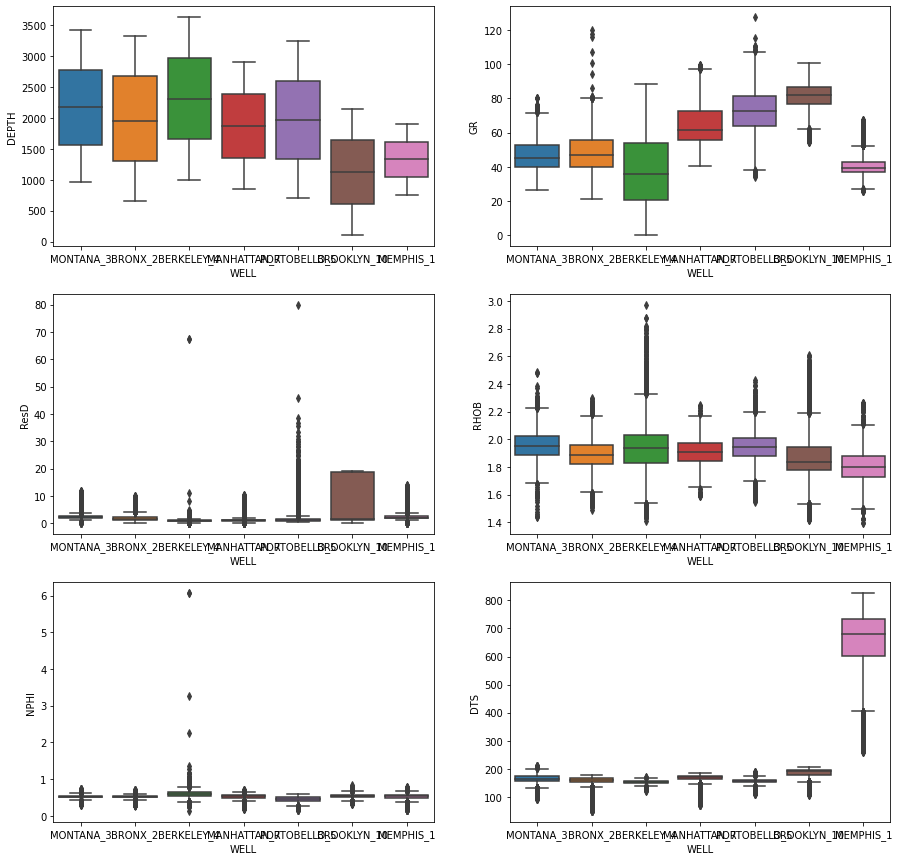

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(321)
sns.boxplot(x=dataob['WELL'], y=dataob[colom[0]])
plt.subplot(322)
sns.boxplot(x=dataob['WELL'], y=dataob[colom[1]])
plt.subplot(323)
sns.boxplot(x=dataob['WELL'], y=dataob[colom[2]])
plt.subplot(324)
sns.boxplot(x=dataob['WELL'], y=dataob[colom[3]])
plt.subplot(325)
sns.boxplot(x=dataob['WELL'], y=dataob[colom[4]])
plt.subplot(326)
sns.boxplot(x=dataob['WELL'], y=dataob[colom[5]])

plt.show()

In [ ]:
for i in range(1,len(colom)):
  percentile_05 = dataob.groupby('WELL')[colom[i]].quantile(0.05)
  gr_percentile_95 = dataob.groupby('WELL')['GR'].quantile(0.95)  
  name = "{}_05p".format(colom[i])
  name2 = "{}_95p".format(colom[i])
  dataob[name] = dataob['WELL'].map(percentile_05)
  dataob[name2] = dataob['WELL'].map(gr_percentile_95)

In [ ]:
def normalise(curve, ref_low, ref_high, well_low, well_high):
    return ref_low + ((ref_high - ref_low) * ((curve - well_low) / (well_high - well_low)))

for i in range(5):
  key_well_low =  dataob["{}_05p".format(colom[i+1])].mean()
  key_well_high = dataob["{}_95p".format(colom[i+1])].mean()
  name = "norm_{}".format(colom[i+1])
  dataob[name] = dataob.apply(lambda x: normalise(x[colom[i+1]], key_well_low, key_well_high, x["{}_05p".format(colom[i+1])], x["{}_95p".format(colom[i+1])]), axis=1)

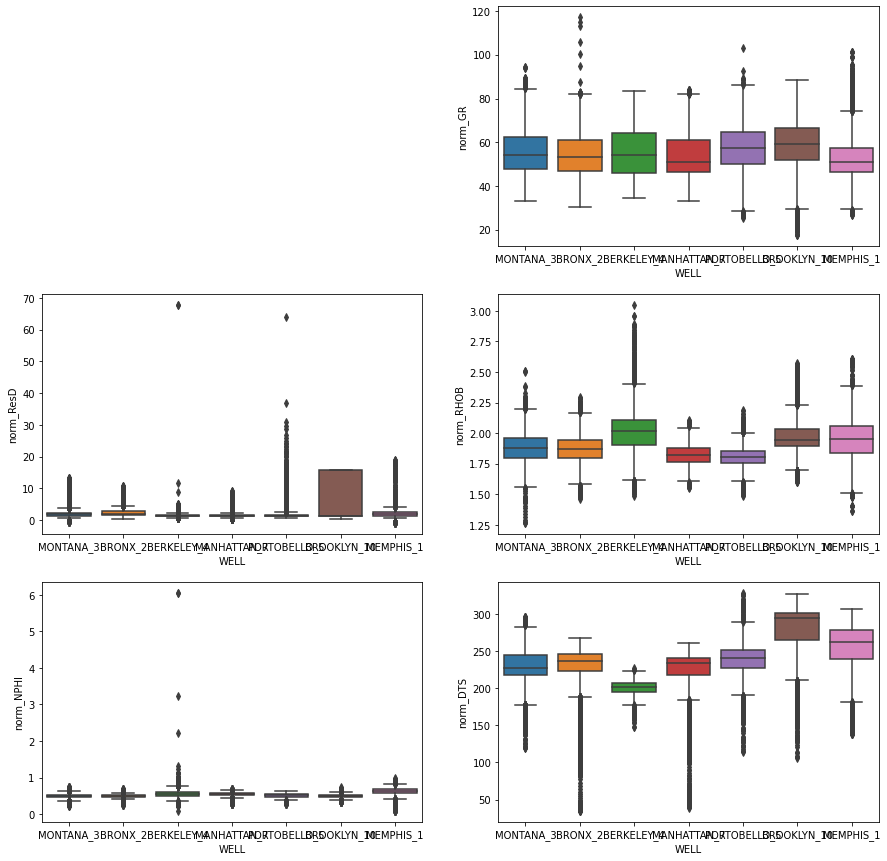

In [ ]:
plt.figure(figsize=(15,15))
# plt.subplot(321)
# sns.boxplot(x=data['WELL'], y=data["norm_{}".format(colom[0])])
plt.subplot(322)
sns.boxplot(x=dataob['WELL'], y=dataob["norm_{}".format(colom[1])])
plt.subplot(323)
sns.boxplot(x=dataob['WELL'], y=dataob["norm_{}".format(colom[2])])
plt.subplot(324)
sns.boxplot(x=dataob['WELL'], y=dataob["norm_{}".format(colom[3])])
plt.subplot(325)
sns.boxplot(x=dataob['WELL'], y=dataob["norm_{}".format(colom[4])])
plt.subplot(326)
sns.boxplot(x=dataob['WELL'], y=dataob["norm_{}".format(colom[5])])

plt.show()

In [ ]:
maxd = data['DEPTH'].max()
mind = data['DEPTH'].min()
mind

100.0

In [ ]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib


def display_cm(cm, labels, hide_zeros=False,
                             display_metrics=False):
    """Display confusion matrix with labels, along with
       metrics such as Recall, Precision and F1 score.
       Based on Zach Guo's print_cm gist at
       https://gist.github.com/zachguo/10296432
    """

    precision = np.diagonal(cm)/cm.sum(axis=0).astype('float')
    recall = np.diagonal(cm)/cm.sum(axis=1).astype('float')
    F1 = 2 * (precision * recall) / (precision + recall)
    
    precision[np.isnan(precision)] = 0
    recall[np.isnan(recall)] = 0
    F1[np.isnan(F1)] = 0
    
    total_precision = np.sum(precision * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_recall = np.sum(recall * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    total_F1 = np.sum(F1 * cm.sum(axis=1)) / cm.sum(axis=(0,1))
    #print total_precision
    
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + " Pred", end=' ')
    for label in labels: 
        print("%{0}s".format(columnwidth) % label, end=' ')
    print("%{0}s".format(columnwidth) % 'Total')
    print("    " + " True")
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=' ')
        for j in range(len(labels)): 
            cell = "%{0}d".format(columnwidth) % cm[i, j]
            if hide_zeros:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            print(cell, end=' ')
        print("%{0}d".format(columnwidth) % sum(cm[i,:]))
        
    if display_metrics:
        print()
        print("Precision", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % precision[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_precision)
        print("   Recall", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % recall[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_recall)
        print("       F1", end=' ')
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % F1[j]
            print(cell, end=' ')
        print("%{0}.2f".format(columnwidth) % total_F1)
    
                  
def display_adj_cm(
        cm, labels, adjacent_facies, hide_zeros=False, 
        display_metrics=False):
    """This function displays a confusion matrix that counts 
       adjacent facies as correct.
    """
    adj_cm = np.copy(cm)
    
    for i in np.arange(0,cm.shape[0]):
        for j in adjacent_facies[i]:
            adj_cm[i][i] += adj_cm[i][j]
            adj_cm[i][j] = 0.0
        
    display_cm(adj_cm, labels, hide_zeros, 
                             display_metrics)
        

def make_facies_log_plot(logs, ref,maxd, mind):

    logs = logs.sort_values(by='DEPTH')
    # ztop=ref.DEPTH.min(); zbot=ref.DEPTH.max()
    f, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 20))
    plt.subplots_adjust(left=0.1, 
                    right=0.9,  
                    wspace=0.4)
    
    ax[0].yaxis.set_minor_locator(MultipleLocator(100))
    # ax[0].yaxis.set_major_locator(MultipleLocator(0))
    ax[0].plot(logs.norm_GR, logs.DEPTH, '-g', lw = 0.5)
    ax[1].plot(np.log10(logs.norm_ResD), logs.DEPTH, '-')
    ax[2].plot(logs.norm_RHOB, logs.DEPTH, '-', color='grey')
    ax3 = ax[2].twiny()
    ax3.plot(logs.NPHI, logs.DEPTH, '-', color='r')
    ax[3].plot(logs.norm_DTS, logs.DEPTH, '-', color='m')

    for i in range(len(ax)):
        ax[i].set_ylim(mind,maxd)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_xlabel("GR_NORM")
    ax[0].set_xlim(0,100)
    ax[0].tick_params(axis='x', colors="green")
    ax[0].spines["top"].set_edgecolor("green")
    ax[0].title.set_color('green')
    ax[0].grid(which='major', color='lightgrey', linestyle='-')
    ax[0].xaxis.set_ticks_position("top")
    ax[0].xaxis.set_label_position("top")
    ax[0].spines["top"].set_position(("axes", 1.02))
    
    ax[1].set_xlabel("ResD")
    ax[1].set_xscale('log')
    ax[1].set_xlim(0.2,200)
    ax[1].set_xticks([0.2, 10, 200])
    ax[1].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax[1].tick_params(axis='x', colors="b")
    ax[1].spines["top"].set_edgecolor("b")
    ax[1].title.set_color('b')
    ax[1].grid(which='major', color='lightgrey', linestyle='-')
    ax[1].xaxis.set_ticks_position("top")
    ax[1].xaxis.set_label_position("top")
    ax[1].spines["top"].set_position(("axes", 1.02))
    

    ax[2].set_xlabel("RHOB")
    ax[2].set_xlim(1.7,2.7)
    ax[2].tick_params(axis='x', colors="grey")
    ax[2].spines["top"].set_edgecolor("grey")
    ax[2].title.set_color('r')
    ax[2].grid(which='major', color='lightgrey', linestyle='-')
    ax[2].xaxis.set_ticks_position("top")
    ax[2].xaxis.set_label_position("top")
    ax[2].spines["top"].set_position(("axes", 1.02))
    
    ax3.set_xlabel("NPHI")
    ax3.set_xlim(0.6,0)
    ax3.tick_params(axis='x', colors="r")
    ax3.spines["top"].set_edgecolor("r")
    ax3.title.set_color('green')
    ax3.grid(which='major', color='lightgrey', linestyle='-')
    ax3.xaxis.set_ticks_position("top")
    ax3.xaxis.set_label_position("top")
    ax3.spines["top"].set_position(("axes", 1.08))
    
    ax[3].set_xlabel("DTS")
    ax[3].set_xlim(100,200)
    ax[3].tick_params(axis='x', colors="m")
    ax[3].spines["top"].set_edgecolor("m")
    ax[3].title.set_color('m')
    ax[3].grid(which='major', color='lightgrey', linestyle='-')
    ax[3].xaxis.set_ticks_position("top")
    ax[3].xaxis.set_label_position("top")
    ax[3].spines["top"].set_position(("axes", 1.02))
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    f.suptitle('Well: %s'%logs.iloc[0]['WELL'], fontsize=14,y=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


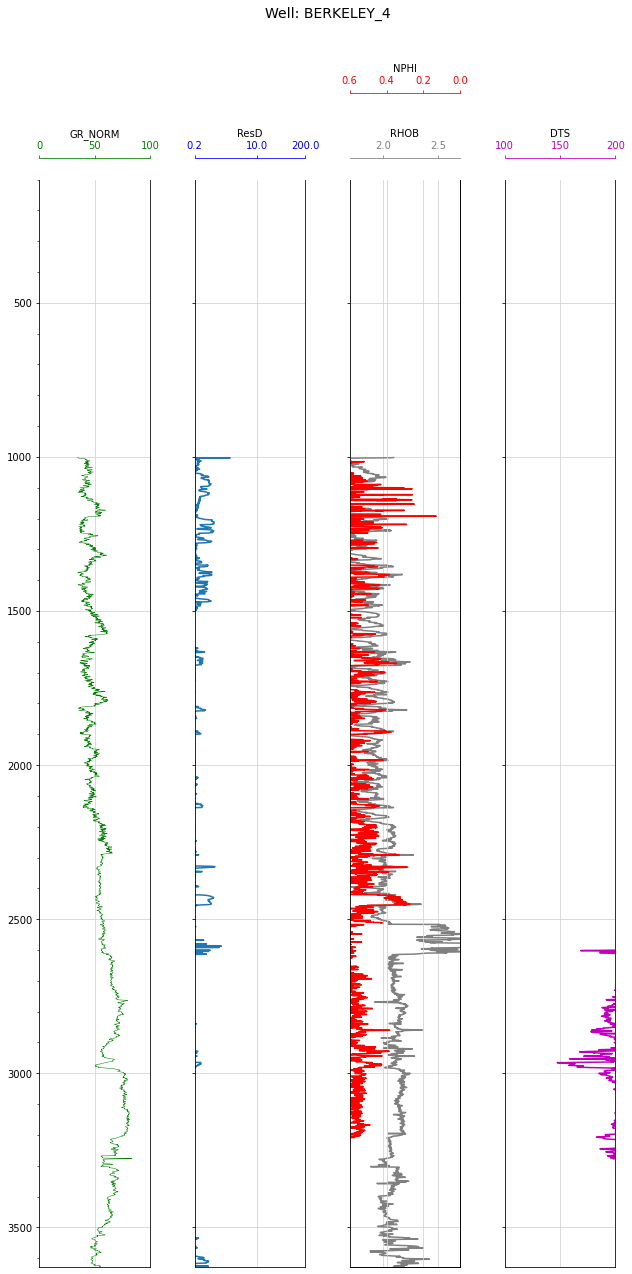

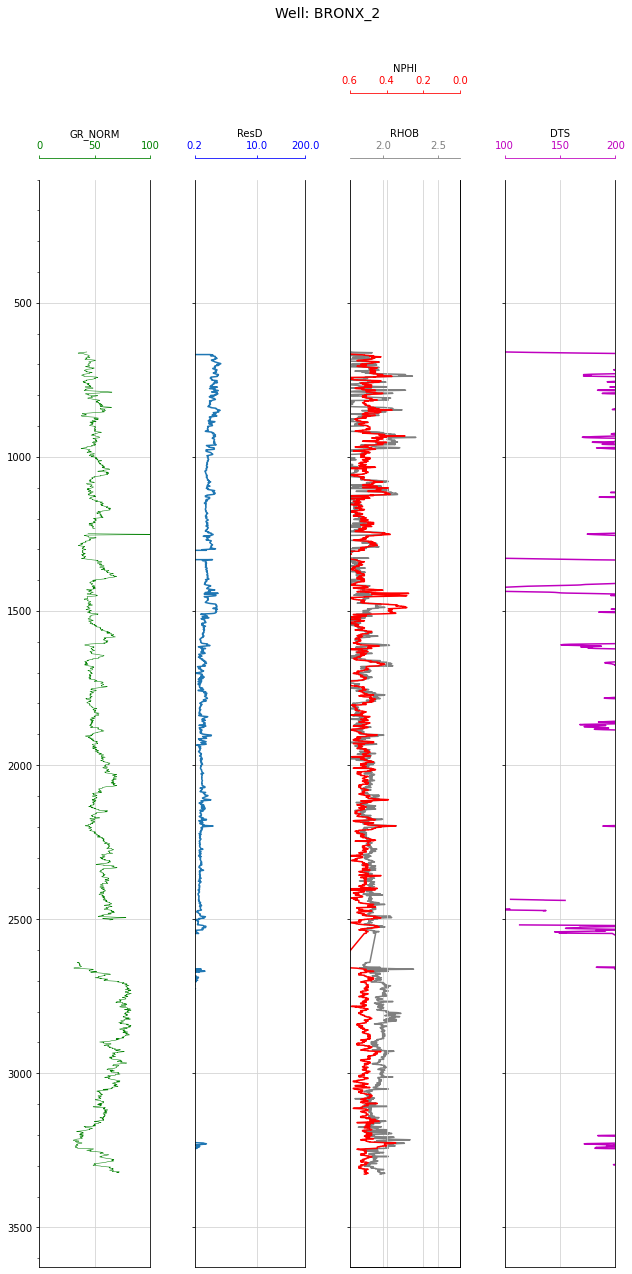

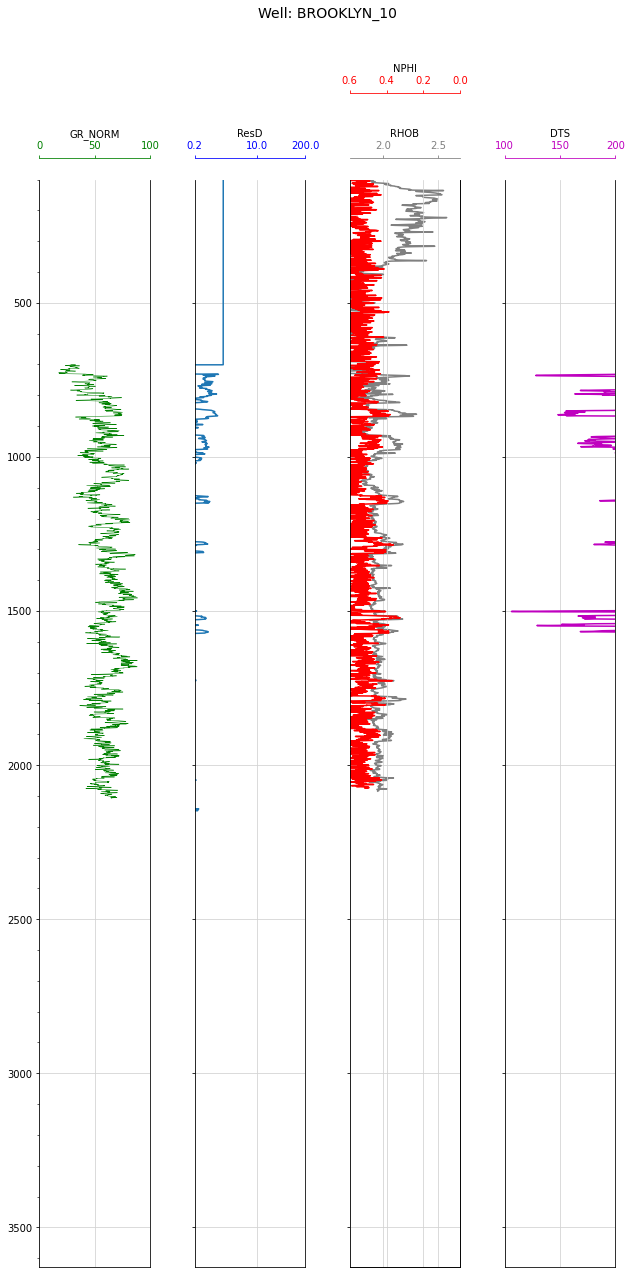

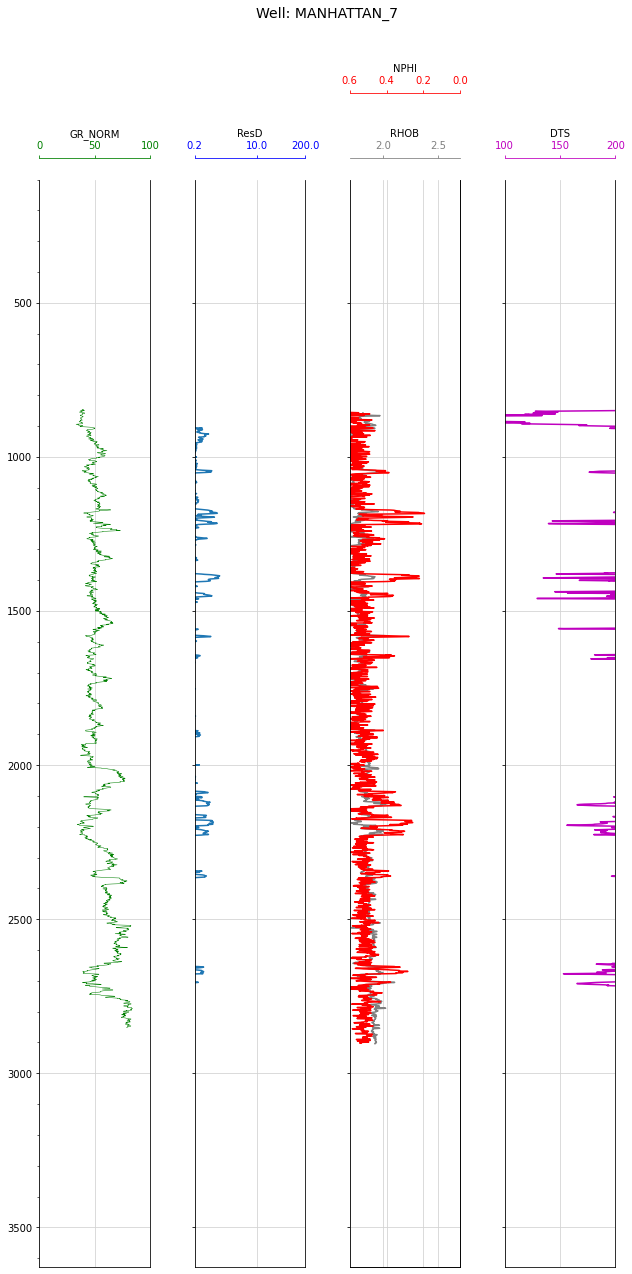

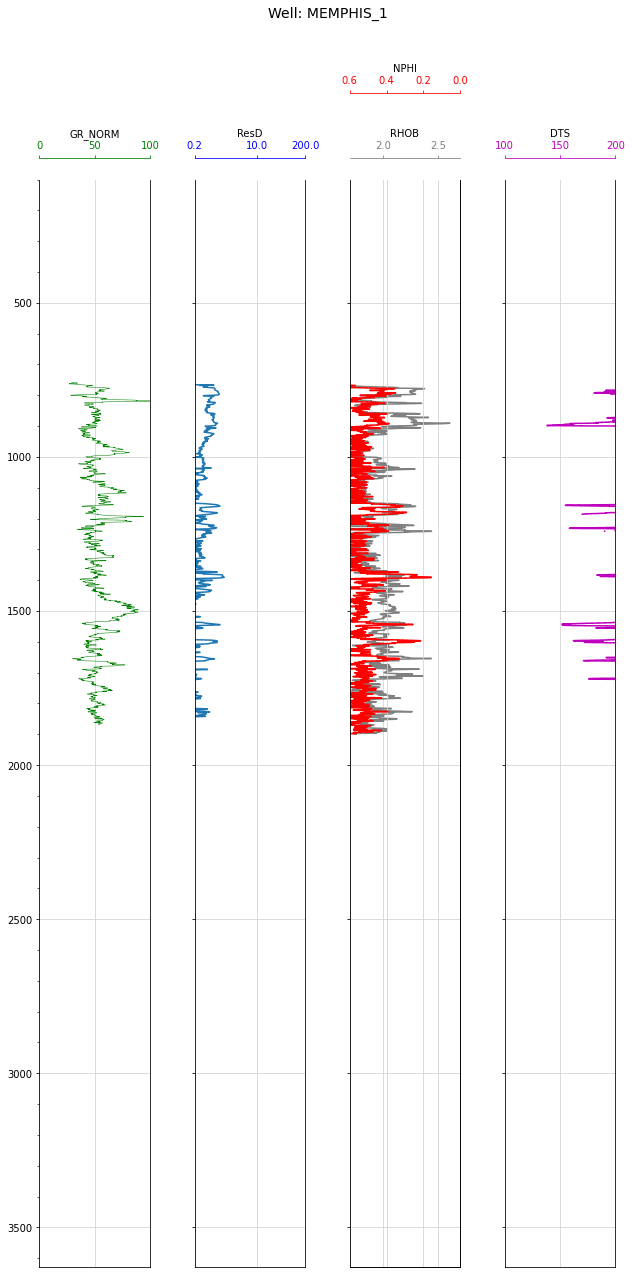

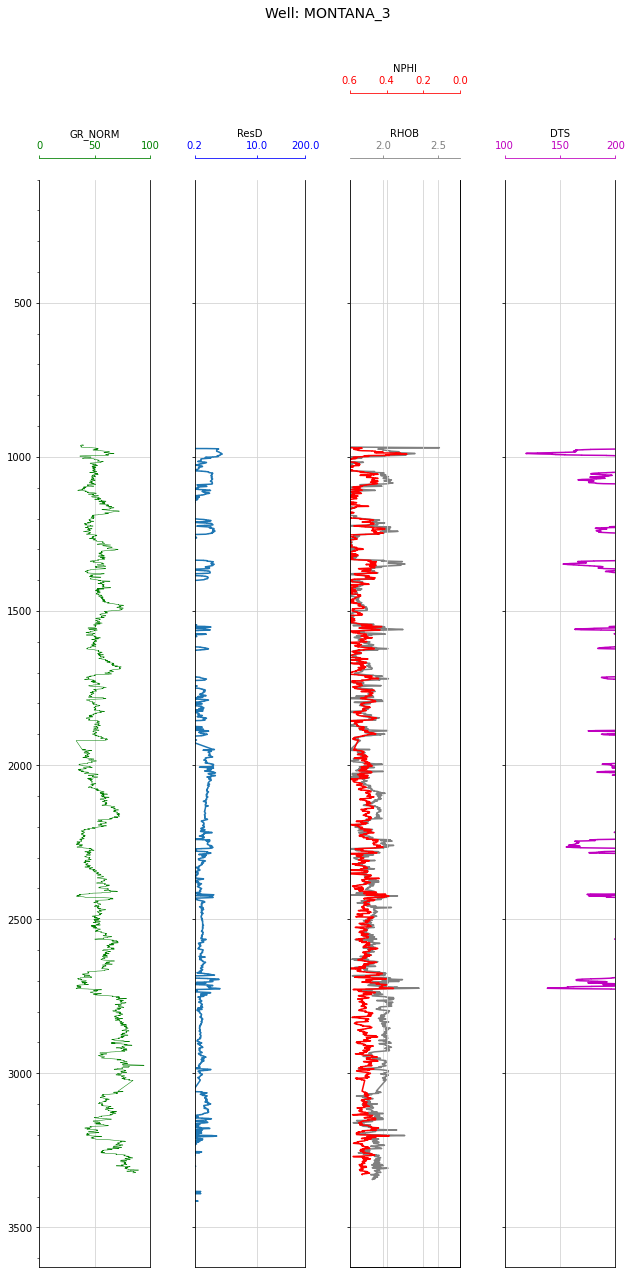

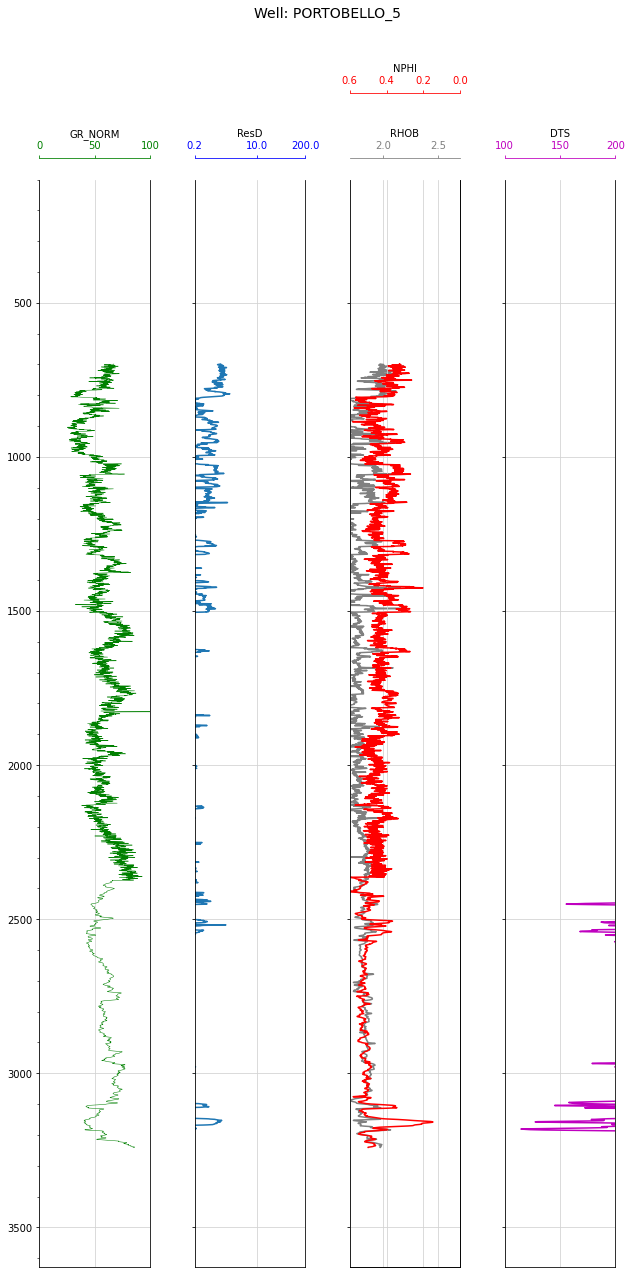

In [ ]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
for i in np.unique(data['WELL']):
  make_facies_log_plot(
      dataob[dataob['WELL']==i], data[data['WELL']==i], maxd, mind)